## Ejercicios de Nomalización:

* Leemos el corpus y pasamos los documentos (Título + Texto) a una lista

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df = pd.read_csv('../data/movies_metadata.csv')
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27692\3061410205.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [192]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [193]:
df = df.dropna(subset=['overview'])

In [194]:
cols = df.columns[df.columns.duplicated()]
n = len(cols)

if n > 0:
    print("Se encontraron columnas duplicadas en el DataFrame:")
    print(cols)
else:
    print("No se encontraron columnas duplicadas en el DataFrame.")

No se encontraron columnas duplicadas en el DataFrame.


In [195]:
df.isnull().sum()

adult                        0
belongs_to_collection    40077
budget                       0
genres                       0
homepage                 36747
id                           0
imdb_id                     15
original_language           10
original_title               0
overview                     0
popularity                   5
poster_path                346
production_companies         3
production_countries         3
release_date                74
revenue                      6
runtime                      6
spoken_languages             6
status                      71
tagline                  24108
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [196]:
docs_list = list()
for e in df['overview']:
    docs_list.append(e)

In [197]:
docs_list

["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
 "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",
 "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she 

In [198]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [199]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
!pip install spacy
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 495.5 kB/s eta 0:00:26
      --------------------------------------- 0.2/12.8 MB 1.6 MB/s eta 0:00:09
     ---------------- ----------------------- 5.3/12.8 MB 30.5 MB/s eta 0:00:01
     ------------------------------- ------ 10.8/12.8 MB 108.8 MB/s eta 0:00:01
     -------------------------------------  12.8/12.8 MB 110.0 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 81.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
import spacy
nlp = spacy.load("en_core_web_sm")

#### 1. **Crear una función que devuelva los documentos *Tokenizados* (una lista de listas) y con los tokens (palabras) en minúsculas.** (3ptos)

* **input**: lista de documentos (lista de Strings).
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [202]:
def tokenization(docs_list):
    tokens = []
    for doc in docs_list:
        lista_tokenizada = [word.lower() for word in word_tokenize(doc)]
        tokens.append(lista_tokenizada)
    return tokens

#### 2. **Crear una función que elimine los tokens que sean signos de puntuación y *Stop-Words*.** (3ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [203]:
# Ver cantidad de stopwords en NLTK y SPACY
print('Cantidad de stopwords de NLTK: ' + str(len(stopwords.words("english"))))
print('Cantidad de stopwords de SPACY: ' + str(len(spacy.lang.en.stop_words.STOP_WORDS)))
# Ver que stopwords contiene NLTK Y SPACY
print('Stop words: ' + str(stopwords.words("english")))
print('Stop words: ' + str(list(spacy.lang.en.stop_words.STOP_WORDS)))
#Elegimos el de spacy por tener más stop words

Cantidad de stopwords de NLTK: 179
Cantidad de stopwords de SPACY: 326
Stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 

In [204]:
def remove_words(docs):
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    punctuation = set(string.punctuation + "¿")
    other_stop_words = ["“", "”","‘","’"]
    without_stop_words = []

    for doc in docs:
      without_stop_and_punct = [word for word in doc if word.lower() not in stop_words and word not in punctuation and word not in other_stop_words]
      without_stop_words.append(without_stop_and_punct)

    return without_stop_words

#### 3. **Crear una función que transforme cada token a su lema (*Lematización*)** (3ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [205]:
def lematization(docs):
    lem_result = []

    for text in docs:
        doc_str = ' '.join(text)
        doc = nlp(doc_str)
        lemas = [token.lemma_ for token in doc]
        lem_result.append(lemas)

    return lem_result

#### 4. **Crear una función que elimine todos los tokens que no sean *Nombres* (NOUN, PROPN), *Verbos*, *Advervios* o *Adjetivos*.** (4ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [206]:
def filter_words(docs):
    doc_filter = []
    for documento_tokens in docs:
        doc_str = ' '.join(documento_tokens)
        doc = nlp(doc_str)
        tok_filter = [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'PROPN', 'VERB', 'ADV', 'ADJ']]
        doc_filter.append(tok_filter)
    return doc_filter

#### 5. **Función que dada una lista de documentos, devuelva los documentos normalizados. Este ejercicio ya esta hecho y simplemente tiene que funcionar llamando a las 4 funciones anteriores.** (3ptos)

* **input**: lista de documentos (lista de Strings).
* **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

In [207]:
def normalization(docs_list):
    corpus = tokenization(docs_list)
    corpus = remove_words(corpus)
    corpus = lematization(corpus)
    corpus = filter_words(corpus)
    return corpus

corpus = normalization(docs_list)
print(corpus[0])

['lead', 'woody', 'andy', 'toy', 'live', 'happily', 'room', 'andy', 'birthday', 'bring', 'buzz', 'lightyear', 'scene', 'afraid', 'lose', 'place', 'andy', 'heart', 'woody', 'plot', 'buzz', 'circumstance', 'separate', 'buzz', 'woody', 'owner', 'duo', 'eventually', 'learn', 'difference']


#### En este ejercicio podemos ver como reducimos las palabras (tokens) del texto original, quedandonos con lo importante y normalizado

In [208]:
def create_list(list_of_lists):
    return [tk for ls in list_of_lists for tk in ls]

In [209]:
print('Número de tokens del texto original: ' + str(len(create_list(tokenization(docs_list)))))
print('Número de tokens distintos del texto original: ' + str(len(set(create_list(tokenization(docs_list))))))
print('Número de tokens tras la normalización: ' + str(len(normalization(docs_list)[0])))
print('Número de tokens distintos tras la normalización: ' + str(len(set(normalization(docs_list)[0]))))

Número de tokens del texto original: 2783017
Número de tokens distintos del texto original: 89515
Número de tokens tras la normalización: 30
Número de tokens distintos tras la normalización: 24


<hr>

#### 6. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, elimine del corpus aquellos tokens que aparecen menos de 'N' veces (N=10) en el corpus** (4ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
* **input**: 'N' -> Parámetro que nos indica el número mínimo de apariciones de la palabra en el corpus.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

In [213]:
from nltk.probability import FreqDist

def drop_less_frecuency_words(corpus, n):
    conteo_tokens = FreqDist(token for doc in corpus for token in doc)
    corpus_filtrado = [[token for token in doc if conteo_tokens[token] >= n] for doc in corpus]
    return corpus_filtrado

corpus = drop_less_frecuency_words(corpus, 10)
print(corpus[0])

['lead', 'woody', 'andy', 'toy', 'live', 'happily', 'room', 'andy', 'birthday', 'bring', 'buzz', 'scene', 'afraid', 'lose', 'place', 'andy', 'heart', 'woody', 'plot', 'buzz', 'circumstance', 'separate', 'buzz', 'woody', 'owner', 'duo', 'eventually', 'learn', 'difference']


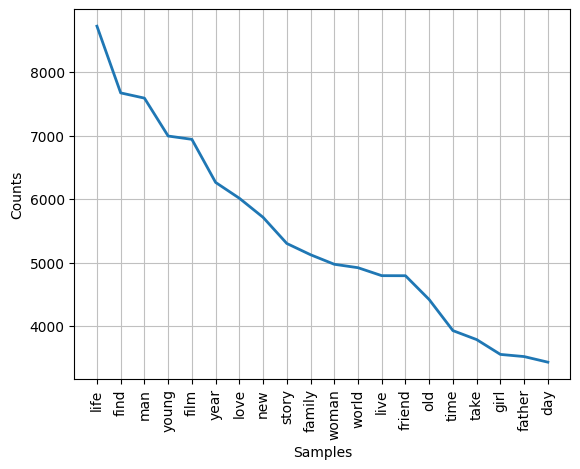

<Axes: xlabel='Samples', ylabel='Counts'>

In [214]:
conteo_tokens = FreqDist(token for doc in corpus for token in doc)
conteo_tokens.plot(20)

In [212]:
conteo_tokens.tabulate()

            life             find              man            young             film             year             love              new            story           family            woman            world             live           friend              old             time             take             girl           father              day             come             work             meet               go              war             wife             fall              set            begin              way             town             turn            leave              try             home         discover             help           murder           school             kill           mother              son              get             good         daughter           people             lead             know            force           decide              boy            death            child             city           follow           return             want            group          broth